## Praca domowa 4

#### Autor: Grzegorz Zakrzewski

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

**a)** Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.

In [10]:
df.loc[(df.Year > 2015) & (df.NA_Sales < df.EU_Sales)].reset_index(drop = True)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,222,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77
1,272,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,Sony Computer Entertainment,1.30,2.07,0.18,0.65,4.20
2,352,Tom Clancy's The Division,PS4,2016.0,Shooter,Ubisoft,1.28,1.61,0.15,0.57,3.61
3,772,Far Cry: Primal,PS4,2016.0,Action,Ubisoft,0.59,1.16,0.06,0.33,2.13
4,1028,Overwatch,PS4,2016.0,Shooter,Activision,0.64,0.68,0.14,0.26,1.73
...,...,...,...,...,...,...,...,...,...,...,...
122,16533,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,Milestone S.r.l,0.00,0.01,0.00,0.00,0.01
123,16534,Hitman (2016),XOne,2016.0,Action,Square Enix,0.00,0.01,0.00,0.00,0.01
124,16558,Codename: Panzers Complete Collection,PC,2016.0,Strategy,Nordic Games,0.00,0.01,0.00,0.00,0.01
125,16573,Farming 2017 - The Simulation,PS4,2016.0,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01


**b)** Jak rodzaj gry zarobił najwięcej w roku 2010?

In [25]:
df.loc[df.Year == 2010, ['Genre', 'Global_Sales']].groupby('Genre').sum().sort_values("Global_Sales", ascending = False)

,Global_Sales
Genre,
Action,117.64
Misc,96.86
Sports,92.53
Shooter,77.41
Role-Playing,70.52
Racing,34.93
Platform,31.90
Simulation,21.99
Adventure,16.57


**Odp.** Były to gry akcji.

**c)** Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [43]:
tmp = df.loc[:, ['Genre','EU_Sales', "JP_Sales"]].groupby('Genre').mean()
tmp = tmp.loc[tmp.JP_Sales > tmp.EU_Sales].drop('EU_Sales', axis = 1).sort_values('JP_Sales').reset_index()
tmp = tmp.rename(columns = {'Genre': 'Typ Gry', 'JP_Sales': 'Średnia sprzedaż w Japonii'})
tmp

,Typ Gry,Średnia sprzedaż w Japonii
0,Strategy,0.073284
1,Puzzle,0.099439
2,Role-Playing,0.238293


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

**1)** oryginalny wykres - opublikowany przez TVP w wydaniu Wiadomości z godziny 19:30 dnia 28.10.2021r. ([źródło](https://wiadomosci.tvp.pl/56266342/28102021-1930))

![](./data/wykres.png)

**2)** wykres w ggplot2 - [link do pracy domowej](https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/ZakrzewskiGrzegorz/hw2.html)

![](./data/corrected_plot.png)

**3)** poprawiony wykres

<AxesSubplot:title={'center':'25 countries with the highest CO2 emissions'}, xlabel='CO2 emissions in millions of tons', ylabel='Country'>

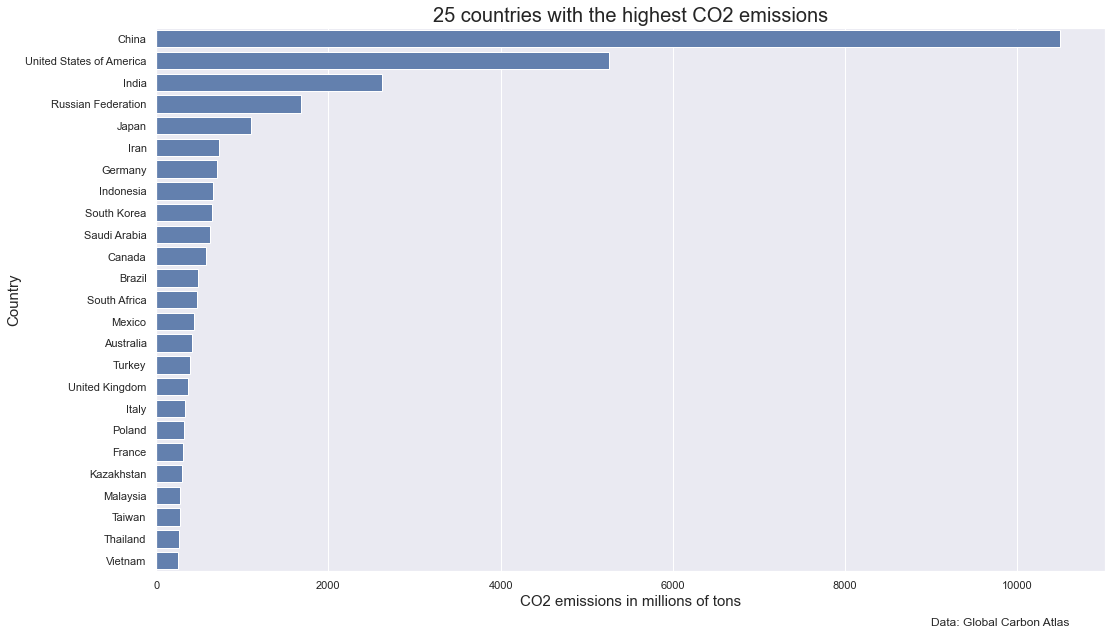

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize': (17,10), 'axes.titlesize': 20, 'axes.labelsize': 15})
sns.set_style("darkgrid")

df = pd.read_csv("./data/global_co2.csv")
df = df[df.Year == 2019]
df = pd.melt(df, 
            id_vars = ["Year"],
            var_name = "Country",
            value_name = "MtCO2")
df = df.sort_values('MtCO2', ascending = False).head(25).reset_index(drop = True)

plot = sns.barplot(y = df.Country, x = df.MtCO2, color='#577dba')
plot.set(
    title = "25 countries with the highest CO2 emissions",
    xlabel = "CO2 emissions in millions of tons",
)
plot.text( x= 9000, y =27, s = "Data: Global Carbon Atlas")

plot

![](./data/seaborn_plot.png)

**4)** Czemu wykres w Pythonie jest lepszy od dwóch pozostałych?

Obydwa stworzone wykresy są lepsze od oryginalnego, ponieważ:
* słupki są 2d
* słupki nie zawierają etykiet, które swoim rozmiarem mogą zaburzyć porównywanie ich wysokości;
* dodana oś pozioma ułatwia porównywanie wartości;
* wykres oryginalny zestawia tylko dziewięć wybranych krajów z listy, co zaciemnia sytuację

Natomiast wykres *3* jest lepszy od wykresu *2*, poniważ:
* jest ładniejszy pod względem estetycznym
* jest spójny językowo - na wykresie *2* opisy są po polsku, a nazwy krajów po angielsku